In [1]:
import warnings
import pandas as pd
import numpy as np

import src.stlouisfed as fred
from src import utils, plotting
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
data_name = "GDP"
data1 = fred.get_series_observation(data_name)
data1.rename(columns={'lin': 'Close'}, inplace=True)
data1.index = data_1.index.tz_localize('UTC').tz_convert('America/New_York')
data1 = data1[data1.index > '2012-01-01']

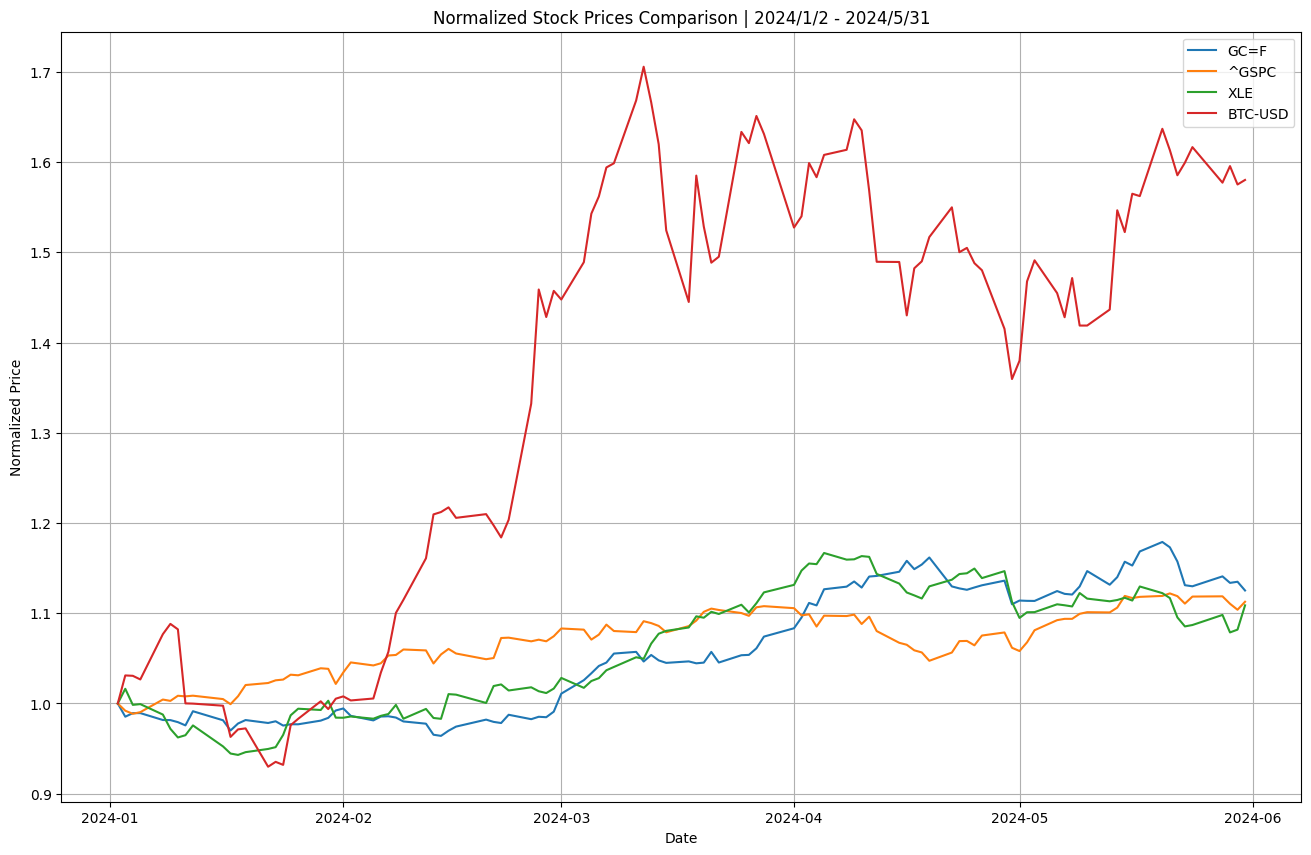

GC=F / ^GSPC correlation: 0.70062189
GC=F / XLE correlation:   0.90500857
GC=F / BTC-USD correlation:0.76126187
^GSPC / XLE correlation:  0.74649954
^GSPC / BTC-USD correlation:0.86629549
XLE / BTC-USD correlation:0.83079070


In [2]:
plot = plotting.compare_assets(
    [
        'GC=F',     # Gold
        '^GSPC',    # S&P 500
        'XLE',      # Energy Select Sector SPDR ETF
        'BTC-USD',  # Bitcoin
    ],
    start_date=[2024, 1, 1],
    end_date=[2024, 6, 1],
)